# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | new plymouth
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | minas de marcona
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | saint croix
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | tarko-sale
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | trincomalee
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | kalamata
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | st. john's
Processing Recor

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,64.78,81,27,13.00,PT,1731812033
1,adamstown,-25.0660,-130.1015,74.77,79,0,6.67,PN,1731812034
2,susuman,62.7833,148.1667,-15.45,99,97,2.46,RU,1731812035
3,edinburgh of the seven seas,-37.0676,-12.3116,53.19,62,37,17.76,SH,1731812036
4,new plymouth,-39.0667,174.0833,60.31,100,4,4.43,NZ,1731812037


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,64.78,81,27,13.00,PT,1731812033
1,adamstown,-25.0660,-130.1015,74.77,79,0,6.67,PN,1731812034
2,susuman,62.7833,148.1667,-15.45,99,97,2.46,RU,1731812035
3,edinburgh of the seven seas,-37.0676,-12.3116,53.19,62,37,17.76,SH,1731812036
4,new plymouth,-39.0667,174.0833,60.31,100,4,4.43,NZ,1731812037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

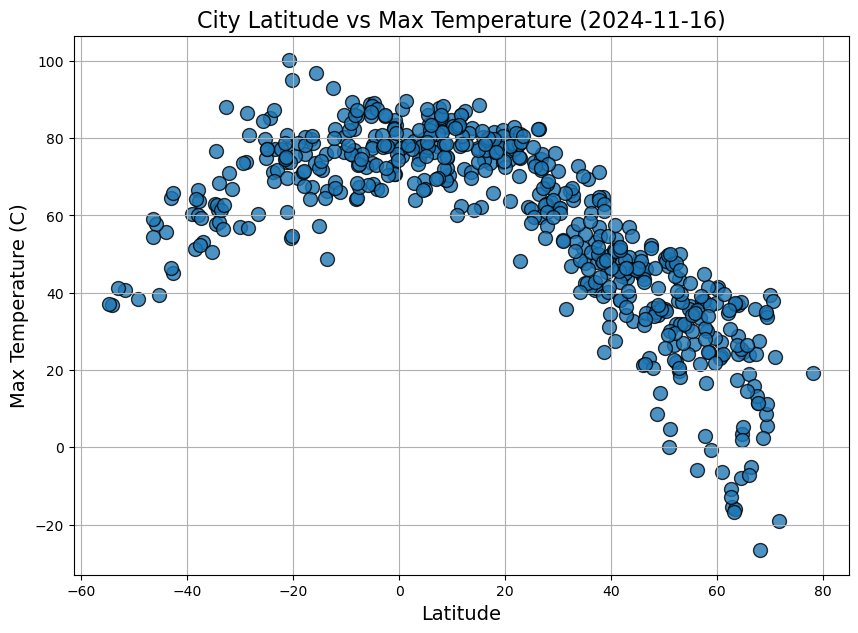

In [14]:
# Build scatter plot for latitude vs. temperature
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, max_temp, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
plt.show()



#### Latitude Vs. Humidity

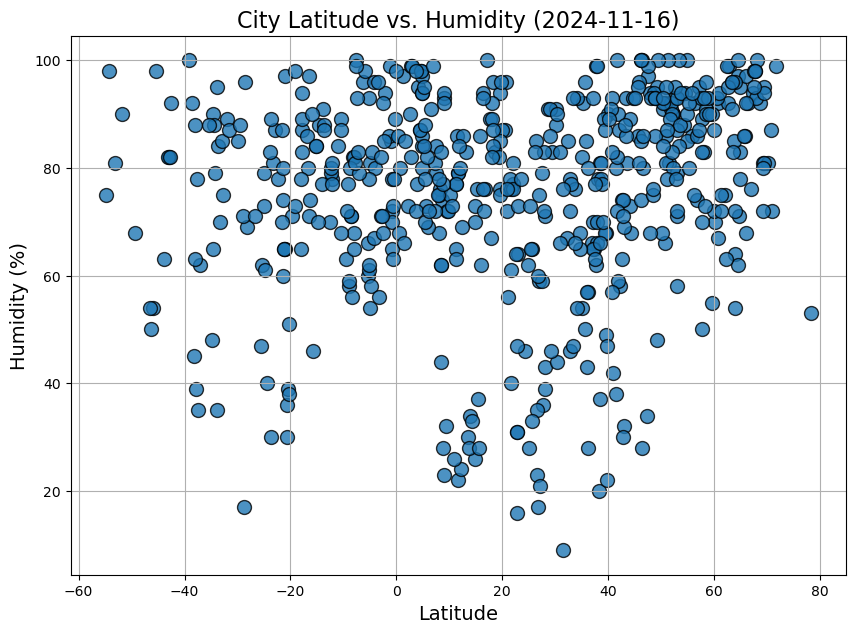

In [16]:
# Build the scatter plots for latitude vs. humidity
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
humid = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, humid, s = 100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

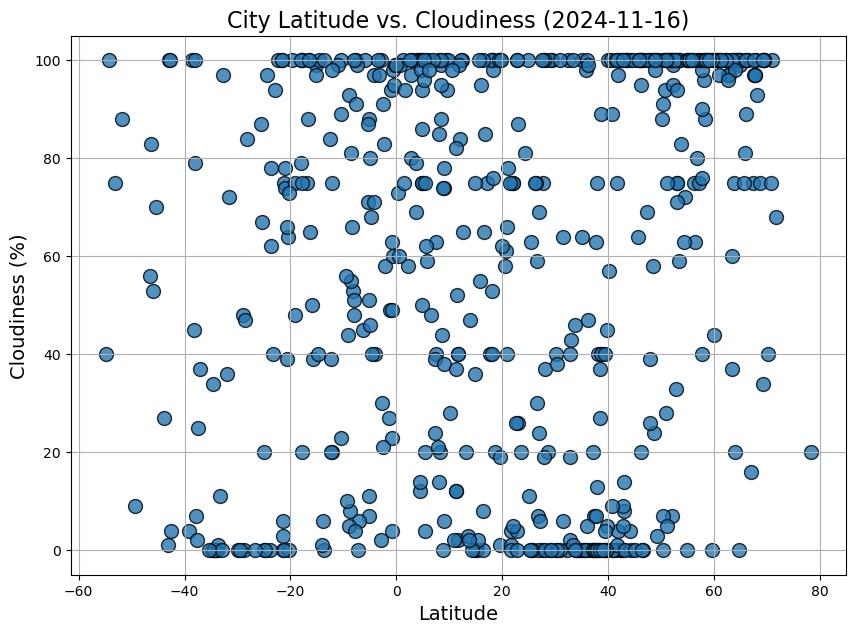

In [18]:
# Build the scatter plots for latitude vs. cloudiness
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, clouds, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

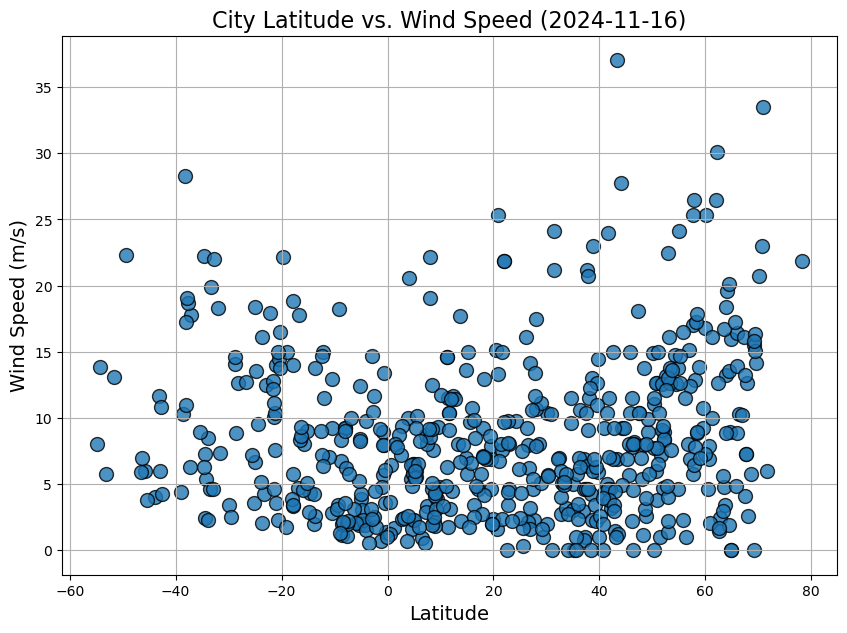

In [20]:
# Build the scatter plots for latitude vs. wind speed
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, wind, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid()
        
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Retrieve regression values
    regress_values = x_axis * slope + intercept
    
    # Line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Build the scatter plots 

    fig1, ax1 = plt.subplots(figsize=(10,7))
    plt.scatter(x_axis, y_axis, s=100, marker="o", alpha=0.8)
    plt.plot(x_axis,regress_values,"r-")  
    
    # Incorporate the other graph properties
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ({curr_date})",fontsize = 16)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,64.78,81,27,13.00,PT,1731812033
2,susuman,62.7833,148.1667,-15.45,99,97,2.46,RU,1731812035
5,enewetak,11.3474,162.3373,83.17,65,12,11.50,MH,1731812038
9,saint croix,17.7397,-64.7388,77.45,89,40,5.75,VI,1731812043
10,whitehorse,60.7161,-135.0538,27.37,92,100,6.91,CA,1731812044


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,74.77,79,0,6.67,PN,1731812034
3,edinburgh of the seven seas,-37.0676,-12.3116,53.19,62,37,17.76,SH,1731812036
4,new plymouth,-39.0667,174.0833,60.31,100,4,4.43,NZ,1731812037
6,west island,-12.1568,96.8225,82.38,78,75,14.97,CC,1731812040
7,minas de marcona,-15.2119,-75.1103,57.36,84,99,9.01,PE,1731812041


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7762221113033196


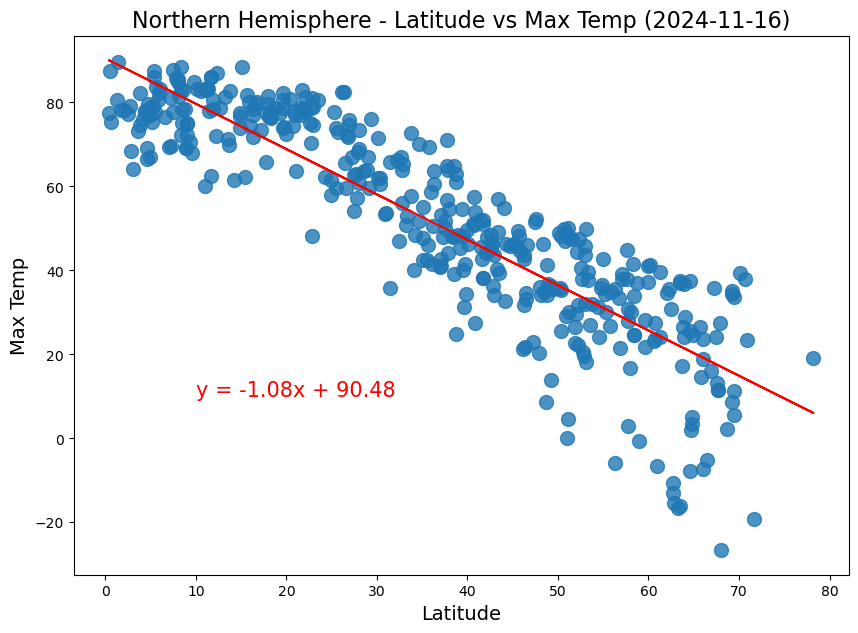

In [26]:

# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern', (10, 10))
          
# Save Figure
#plt.savefig("../output_data/fig1_northern_regression.png")
# Show plot
#plt.show()



The r-squared is: 0.43304656128393404


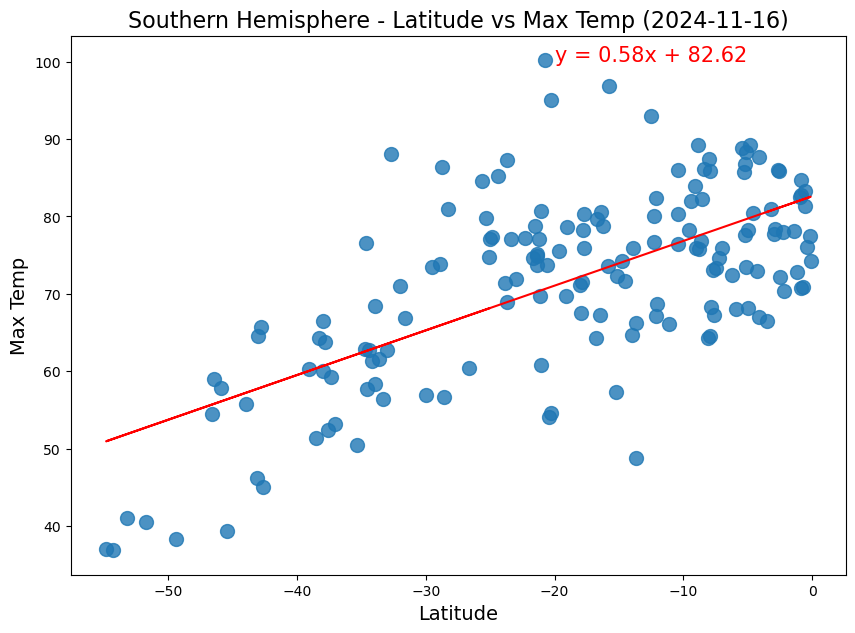

In [28]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern', (-20, 100))
          
# Save Figure
#plt.savefig("../output_data/fig1_southern_regression.png")
# Show plot
#plt.show()

### **Discussion about the linear relationship:** 
For the northern hemisphere's linear relationship, we see that when the latitude increases, the maximum temperature decreases. We see that in the linear equation that the slope is -1.8. That means that whenever the x and y values increases, the maximum temperature will decrease by 0.6. For the southern hemisphere's linear relationship, we see that when the latitude increases, the maximum temperature increases. We see that in the linear equation that the slope is 0.38. That means that whenever the x and y values increase, the maximum temperature will increase by 0.38.
e.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05177841695248281


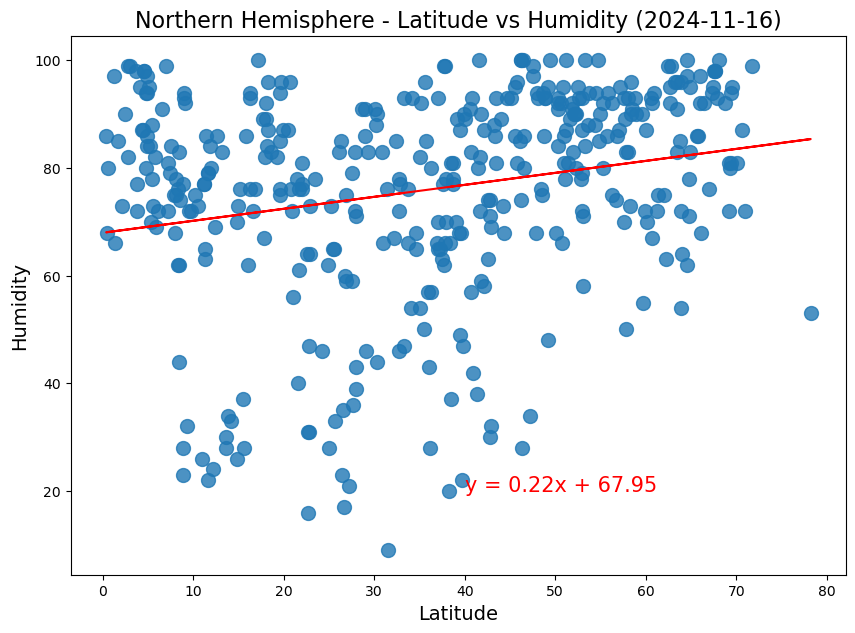

In [30]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern', (40, 20))
          
# Save Figure
#plt.savefig("../output_data/fig2_northern_regression.png")
# Show plot
#plt.show()

The r-squared is: 0.012520842114697693


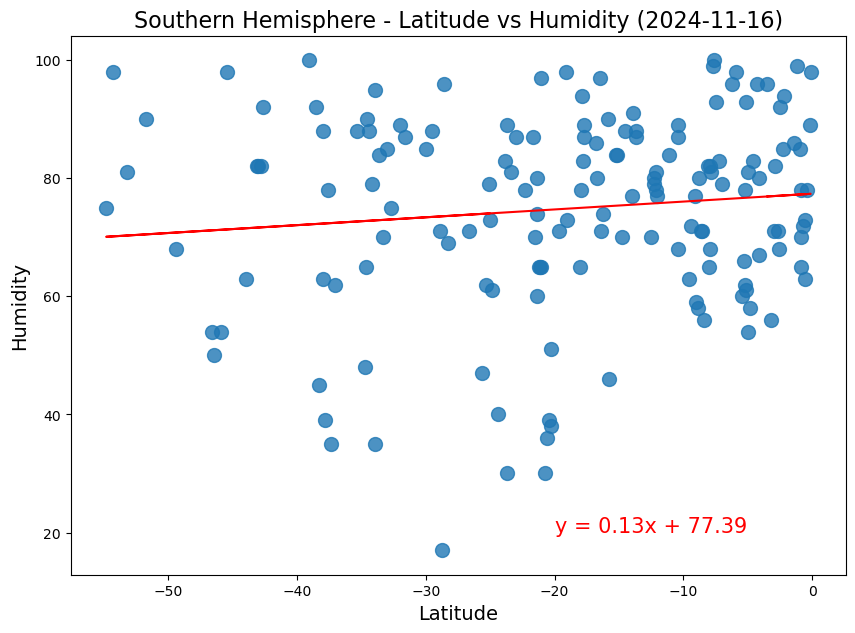

In [31]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern', (-20, 20))
          
# Save Figure
#plt.savefig("../output_data/fig2_southern_regression.png")
# Show plot
#plt.show()

**Discussion about the linear relationship:** 
The r^2-value for the northern hemisphere is: 0.08666126447319747 and the r^2-value for the southern hemisphere is: 0.011909384801287254. This means that for both hemispheres, there is a weak relationship between the latitude and humidity. For the northern hemisphere, 8.7% of the variation in the humdity can be explained by the latitude. This indicates a slightly stronger relationship between the humidity and latitude for the northern hemisphere compared to the southern hemisphere. For the southern hemisphere, 1.2% of the variation in the humidity can be explained by the latitude.
For the northern hemisphere's linear relationship, we see that when the latitude increases, the humidity increases. We see that in the linear equation that the slope is 0.34. That means that whenever the x and y values increases, the humidity will increase by 0.34. For the southern hemisphere's linear relationship, we also see that when the latitude increases, the humidity increases. We see that in the linear equation that the slope is 0.16. That means that whenever the x and y values increase, the humidity will increase by 0.16.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern', (50, 24))
          
# Save Figure
plt.savefig("../output_data/fig3_northern_regression.png")
# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig3_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** :

For the northern hemisphere's linear relationship, we see that when the latitude increases, the humidity increases. We see that in the linear equation that the slope is 0.34. That means that whenever the x and y values increases, the humidity will increase by 0.34. For the southern hemisphere's linear relationship, we also see that when the latitude increases, the humidity increases. We see that in the linear equation that the slope is 0.16. That means that whenever the x and y values increase, the humidity will increase by 0.16.

The r^2-value for the northern hemisphere is: 0.08666126447319747 and the r^2-value for the southern hemisphere is: 0.011909384801287254. This means that for both hemispheres, there is a weak relationship between the latitude and humidity. For the northern hemisphere, 8.7% of the variation in the humdity can be explained by the latitude. This indicates a slightly stronger relationship between the humidity and latitude for the northern hemisphere compared to the southern hemisphere. For the southern hemisphere, 1.2% of the variation in the humidity can be explained by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern', (0, 30))
          
# Save Figure
plt.savefig("../output_data/fig4_northern_regression.png")
# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern', (-30, 25))
          
# Save Figure
plt.savefig("../output_data/fig4_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere's linear relationship, we see that when the latitude increases, the wind speed increases. We see that in the linear equation that the slope is 0.03. That means that whenever the x and y values increases, the wind speed will increase by 0.03. For the southern hemisphere's linear relationship, we see that when the latitude increases, the wind speed decreases. We see that in the linear equation that the slope is -0.08. That means that whenever the x and y values increase, the maximum temperature will decrease by 0.08.

The r^2-value for the northern hemisphere is: 0.03955849838925388 and the r^2-value for the southern hemisphere is: 0.1470111078375406. This means that for both hemispheres, there is a weak relationship between the latitude and cloudiness. For the northern hemisphere, 3.96% of the variation in the cloudiness can be explained by the latitude. Different from the humidity and latitude relationship and the cloudiness and latitude relationship, the r^2-values indicates a slightly stronger relationship between the wind speed and latitude for the southern hemisphere compared to the northern hemisphere. For the southern hemisphere, 1.47% of the variation in the wind speed can be explained by the latitude.